In [35]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [36]:
poverty_csv = pd.read_csv("Poverty_Total_Clean2.csv")
poverty_df = pd.DataFrame(poverty_csv)

home_ownership_csv = pd.read_csv("Homeownership_ACS.clean")
home_ownership_df = pd.DataFrame(home_ownership_csv)

In [37]:
home_ownership_df = home_ownership_df[["County", "HOR"]]
poverty_df = poverty_df[["county","Total"]]
home_ownership_df  = home_ownership_df.rename(columns={"County": "county"})
poverty_df.head()

,county,Total
0,"Autauga, AL",1425
1,"Baldwin, AL",3418
2,"Barbour, AL",671
3,"Bibb, AL",787
4,"Blount, AL",1667


In [38]:
home_ownership_df.head()

,county,HOR
0,"Autauga, AL",73.3
1,"Baldwin, AL",72.9
2,"Barbour, AL",62.5
3,"Bibb, AL",75.4
4,"Blount, AL",78.5


In [39]:
sample_home_ownership = home_ownership_df.sample(n=650)
sample_home_ownership = sample_home_ownership.reset_index(drop=True)
sample_home_ownership.head()

,county,HOR
0,"Anderson, SC",70.6
1,"Tulare, CA",56.2
2,"Jay, IN",74.1
3,"Pope, IL",85.4
4,"Fentress, TN",75.6


In [40]:
poverty_analysis = sample_home_ownership.merge(poverty_df, on="county")
poverty_analysis.head()

,county,HOR,Total
0,"Anderson, SC",70.6,5128
1,"Tulare, CA",56.2,15954
2,"Jay, IN",74.1,371
3,"Pope, IL",85.4,83
4,"Fentress, TN",75.6,633


In [41]:
len(poverty_analysis)

650

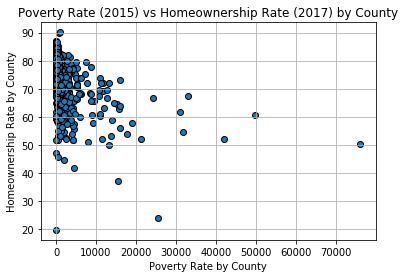

In [42]:
plt.scatter(poverty_analysis["Total"], poverty_analysis["HOR"], marker="o", edgecolor='black')
plt.title("Poverty Rate (2015) vs Homeownership Rate (2017) by County")
plt.ylabel("Homeownership Rate by County")
plt.xlabel("Poverty Rate by County")
plt.grid(True)
plt.savefig('Pictures/Poverty_rate_scatter.png')

In [43]:
x = poverty_analysis["Total"]
y = poverty_analysis["HOR"]
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    HOR   R-squared (uncentered):                   0.104
Model:                            OLS   Adj. R-squared (uncentered):              0.103
Method:                 Least Squares   F-statistic:                              75.73
Date:                Sun, 08 Sep 2019   Prob (F-statistic):                    2.68e-17
Time:                        09:55:15   Log-Likelihood:                         -3665.8
No. Observations:                 650   AIC:                                      7334.
Df Residuals:                     649   BIC:                                      7338.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Total          0.0040      0.000      8.702      0.000       0.003       0.005
==============================================================================
Omnibus:                      750.324   Durbin-Watson:                   0.282
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64187.181
Skew:                          -5.521   Prob(JB):                         0.00
Kurtosis:                      50.414   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
(slope, intercept, _, _, _) = linregress(x, y)
fit = slope * x + intercept

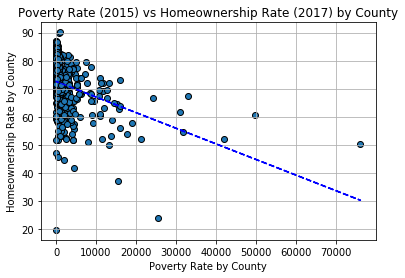

In [45]:
plt.scatter(poverty_analysis["Total"], poverty_analysis["HOR"], marker="o", edgecolor='black')
plt.title("Poverty Rate (2015) vs Homeownership Rate (2017) by County")
plt.ylabel("Homeownership Rate by County")
plt.xlabel("Poverty Rate by County")
plt.grid(True)
plt.plot(x, fit, 'b--')
plt.savefig('Pictures/Poverty_rate_regression.png')